1 - LER O ARQUIVO

In [15]:
# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Tente abrir o arquivo
try:
    with open(nome_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()

    # Agora você pode trabalhar com as linhas do arquivo
    for numero_linha, linha in enumerate(linhas, start=1):
        # Processar cada linha do arquivo como necessário
        print(f"Linha {numero_linha}: {linha.strip()}")  # Exemplo: Imprime cada linha com número

except FileNotFoundError:
    print(f"Arquivo '{nome_arquivo}' não encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao abrir o arquivo: {str(e)}")

Linha 1: NAME : xqf131
Linha 2: COMMENT : Bonn VLSI data set with 131 points
Linha 3: COMMENT : Uni Bonn, Research Institute for Discrete Math
Linha 4: COMMENT : Contributed by Andre Rohe
Linha 5: TYPE : TSP
Linha 6: DIMENSION : 131
Linha 7: EDGE_WEIGHT_TYPE : EUC_2D
Linha 8: NODE_COORD_SECTION
Linha 9: 1 0 13
Linha 10: 2 0 26
Linha 11: 3 0 27
Linha 12: 4 0 39
Linha 13: 5 2 0
Linha 14: 6 5 13
Linha 15: 7 5 19
Linha 16: 8 5 25
Linha 17: 9 5 31
Linha 18: 10 5 37
Linha 19: 11 5 43
Linha 20: 12 5 8
Linha 21: 13 8 0
Linha 22: 14 9 10
Linha 23: 15 10 10
Linha 24: 16 11 10
Linha 25: 17 12 10
Linha 26: 18 12 5
Linha 27: 19 15 13
Linha 28: 20 15 19
Linha 29: 21 15 25
Linha 30: 22 15 31
Linha 31: 23 15 37
Linha 32: 24 15 43
Linha 33: 25 15 8
Linha 34: 26 18 11
Linha 35: 27 18 13
Linha 36: 28 18 15
Linha 37: 29 18 17
Linha 38: 30 18 19
Linha 39: 31 18 21
Linha 40: 32 18 23
Linha 41: 33 18 25
Linha 42: 34 18 27
Linha 43: 35 18 29
Linha 44: 36 18 31
Linha 45: 37 18 33
Linha 46: 38 18 35
Linha 47: 3

2 - PLOT DO GRAFICO

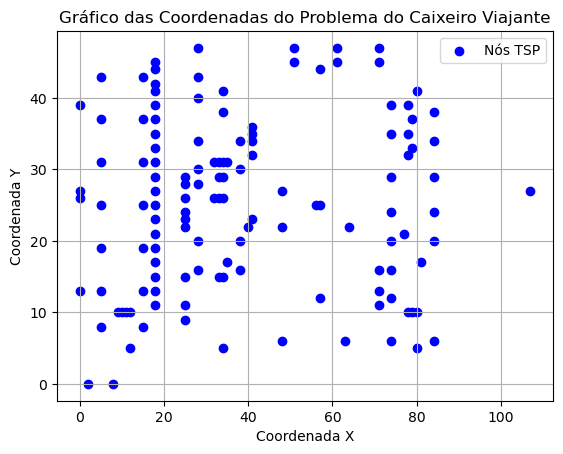

In [16]:
import matplotlib.pyplot as plt

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Tente abrir o arquivo
try:
    with open(nome_arquivo, 'r') as arquivo:
        linhas = arquivo.readlines()

    # Lista para armazenar as coordenadas dos nós
    coordenadas_x = []
    coordenadas_y = []
    lendo_coordenadas = False

    # Agora você pode trabalhar com as linhas do arquivo
    for linha in linhas:
        if linha.strip() == "EOF":
            break  # Fim da seção
        elif lendo_coordenadas:
            partes = linha.strip().split()
            if len(partes) == 3:
                _, x, y = partes
                coordenadas_x.append(float(x))
                coordenadas_y.append(float(y))
        elif linha.startswith("NODE_COORD_SECTION"):
            lendo_coordenadas = True

    # Plote as coordenadas
    plt.scatter(coordenadas_x, coordenadas_y, c='b', marker='o', label='Nós TSP')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Gráfico das Coordenadas do Problema do Caixeiro Viajante')
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Arquivo '{nome_arquivo}' não encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao abrir o arquivo: {str(e)}")





3 - CRIANDO A POPULAÇÃO

In [17]:
import random

# Função para ler as coordenadas do arquivo .tsp
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas_x = []
    coordenadas_y = []
    lendo_coordenadas = False

    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        for linha in linhas:
            if linha.strip() == "EOF":
                break  # Fim da seção
            elif lendo_coordenadas:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas_x.append(float(x))
                    coordenadas_y.append(float(y))
            elif linha.startswith("NODE_COORD_SECTION"):
                lendo_coordenadas = True

    except FileNotFoundError:
        print(f"Arquivo '{nome_arquivo}' não encontrado.")
        return None

    return coordenadas_x, coordenadas_y

# Função para criar um indivíduo (caminho) aleatório com base nas coordenadas
def criar_individuo(coordenadas_x, coordenadas_y):
    coordenadas = list(zip(coordenadas_x, coordenadas_y))
    individuo = coordenadas.copy()
    random.shuffle(individuo)
    return individuo

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo .tsp
coordenadas_x, coordenadas_y = ler_coordenadas_tsp(nome_arquivo)

if coordenadas_x is not None:
    # Número de indivíduos na população
    tamanho_populacao = 10

    # Crie uma população de 10 indivíduos
    populacao = [criar_individuo(coordenadas_x, coordenadas_y) for _ in range(tamanho_populacao)]

    # Exiba a população
    for i, individuo in enumerate(populacao, start=1):
        print(f"Indivíduo {i}: {individuo}")



Indivíduo 1: [(84.0, 20.0), (57.0, 25.0), (80.0, 10.0), (5.0, 19.0), (15.0, 43.0), (25.0, 15.0), (25.0, 24.0), (51.0, 47.0), (34.0, 29.0), (18.0, 23.0), (41.0, 23.0), (71.0, 16.0), (77.0, 21.0), (18.0, 13.0), (25.0, 26.0), (74.0, 6.0), (84.0, 34.0), (5.0, 25.0), (18.0, 39.0), (71.0, 47.0), (56.0, 25.0), (41.0, 35.0), (18.0, 31.0), (84.0, 29.0), (5.0, 43.0), (11.0, 10.0), (41.0, 34.0), (18.0, 25.0), (9.0, 10.0), (18.0, 11.0), (18.0, 33.0), (28.0, 16.0), (48.0, 22.0), (35.0, 31.0), (57.0, 44.0), (15.0, 37.0), (15.0, 13.0), (74.0, 16.0), (33.0, 15.0), (84.0, 6.0), (41.0, 36.0), (2.0, 0.0), (48.0, 6.0), (38.0, 16.0), (0.0, 39.0), (15.0, 31.0), (18.0, 29.0), (18.0, 15.0), (18.0, 35.0), (18.0, 27.0), (25.0, 22.0), (78.0, 10.0), (5.0, 37.0), (38.0, 34.0), (38.0, 30.0), (28.0, 20.0), (33.0, 26.0), (18.0, 21.0), (15.0, 25.0), (57.0, 12.0), (34.0, 15.0), (79.0, 10.0), (12.0, 10.0), (32.0, 31.0), (48.0, 27.0), (107.0, 27.0), (79.0, 37.0), (78.0, 39.0), (28.0, 34.0), (15.0, 19.0), (74.0, 39.0), (6

ORGANIZANDO A POPULAÇÃO

In [18]:
# Função para ler as coordenadas do arquivo .tsp
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas = []
    lendo_coordenadas = False

    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        for linha in linhas:
            if linha.strip() == "EOF":
                break  # Fim da seção
            elif lendo_coordenadas:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas.append((float(x), float(y)))
            elif linha.startswith("NODE_COORD_SECTION"):
                lendo_coordenadas = True

    except FileNotFoundError:
        print(f"Arquivo '{nome_arquivo}' não encontrado.")
        return None

    return coordenadas

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo .tsp
coordenadas = ler_coordenadas_tsp(nome_arquivo)

if coordenadas is not None:
    # Criar uma lista de números de 1 a 131
    numeros = list(range(1, 132))

    # Embaralhar a lista de números para criar uma atribuição aleatória
    random.shuffle(numeros)

    # Criar um dicionário que mapeia os números às coordenadas
    mapeamento = {numero: coordenada for numero, coordenada in zip(numeros, coordenadas)}

    # Exibir o mapeamento de número para coordenada
    for numero, coordenada in mapeamento.items():
        print(f"Nó {numero}: Coordenada {coordenada}")


Nó 53: Coordenada (0.0, 13.0)
Nó 32: Coordenada (0.0, 26.0)
Nó 59: Coordenada (0.0, 27.0)
Nó 95: Coordenada (0.0, 39.0)
Nó 122: Coordenada (2.0, 0.0)
Nó 7: Coordenada (5.0, 13.0)
Nó 51: Coordenada (5.0, 19.0)
Nó 26: Coordenada (5.0, 25.0)
Nó 16: Coordenada (5.0, 31.0)
Nó 86: Coordenada (5.0, 37.0)
Nó 109: Coordenada (5.0, 43.0)
Nó 14: Coordenada (5.0, 8.0)
Nó 77: Coordenada (8.0, 0.0)
Nó 22: Coordenada (9.0, 10.0)
Nó 23: Coordenada (10.0, 10.0)
Nó 24: Coordenada (11.0, 10.0)
Nó 123: Coordenada (12.0, 10.0)
Nó 116: Coordenada (12.0, 5.0)
Nó 60: Coordenada (15.0, 13.0)
Nó 56: Coordenada (15.0, 19.0)
Nó 102: Coordenada (15.0, 25.0)
Nó 68: Coordenada (15.0, 31.0)
Nó 41: Coordenada (15.0, 37.0)
Nó 27: Coordenada (15.0, 43.0)
Nó 70: Coordenada (15.0, 8.0)
Nó 92: Coordenada (18.0, 11.0)
Nó 121: Coordenada (18.0, 13.0)
Nó 30: Coordenada (18.0, 15.0)
Nó 104: Coordenada (18.0, 17.0)
Nó 49: Coordenada (18.0, 19.0)
Nó 36: Coordenada (18.0, 21.0)
Nó 118: Coordenada (18.0, 23.0)
Nó 35: Coordenada (1

In [19]:
import random

# Função para ler as coordenadas do arquivo .tsp
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas = []
    lendo_coordenadas = False

    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        for linha in linhas:
            if linha.strip() == "EOF":
                break  # Fim da seção
            elif lendo_coordenadas:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas.append((float(x), float(y)))
            elif linha.startswith("NODE_COORD_SECTION"):
                lendo_coordenadas = True

    except FileNotFoundError:
        print(f"Arquivo '{nome_arquivo}' não encontrado.")
        return None

    return coordenadas

# Função para criar um indivíduo (caminho) aleatório com base nas coordenadas
def criar_individuo(coordenadas):
    individuo = coordenadas.copy()
    random.shuffle(individuo)
    return individuo

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo .tsp e atribuir números de 1 a 131
coordenadas = ler_coordenadas_tsp(nome_arquivo)

if coordenadas is not None:
    # Atribuir números de 1 a 131 a cada coordenada
    numeros = list(range(1, len(coordenadas) + 1))

    # Criar uma lista de indivíduos aleatórios
    populacao = [criar_individuo(list(zip(numeros, coordenadas))) for _ in range(10)]

    # Exibir a população
    for i, individuo in enumerate(populacao, start=1):
        print(f"Indivíduo {i}: {individuo}")


Indivíduo 1: [(85, (41.0, 35.0)), (31, (18.0, 21.0)), (94, (57.0, 25.0)), (61, (28.0, 47.0)), (81, (40.0, 22.0)), (103, (71.0, 45.0)), (43, (18.0, 44.0)), (12, (5.0, 8.0)), (70, (34.0, 29.0)), (83, (41.0, 32.0)), (39, (18.0, 37.0)), (79, (38.0, 30.0)), (115, (78.0, 32.0)), (33, (18.0, 25.0)), (51, (25.0, 28.0)), (114, (78.0, 10.0)), (96, (61.0, 45.0)), (34, (18.0, 27.0)), (100, (71.0, 11.0)), (117, (78.0, 39.0)), (29, (18.0, 17.0)), (5, (2.0, 0.0)), (32, (18.0, 23.0)), (97, (61.0, 47.0)), (111, (74.0, 39.0)), (119, (79.0, 33.0)), (63, (32.0, 31.0)), (124, (81.0, 17.0)), (88, (48.0, 27.0)), (128, (84.0, 34.0)), (129, (84.0, 38.0)), (130, (84.0, 6.0)), (71, (34.0, 31.0)), (2, (0.0, 26.0)), (116, (78.0, 35.0)), (54, (28.0, 16.0)), (50, (25.0, 26.0)), (56, (28.0, 28.0)), (120, (79.0, 37.0)), (10, (5.0, 37.0)), (74, (34.0, 5.0)), (57, (28.0, 30.0)), (49, (25.0, 24.0)), (65, (33.0, 26.0)), (37, (18.0, 33.0)), (131, (107.0, 27.0)), (23, (15.0, 37.0)), (67, (33.0, 31.0)), (64, (33.0, 15.0)), (


4 - CALCULO DA FITNESS

In [20]:
import random
import math

# Função para ler as coordenadas do arquivo .tsp
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas = []
    lendo_coordenadas = False

    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        for linha in linhas:
            if linha.strip() == "EOF":
                break  # Fim da seção
            elif lendo_coordenadas:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas.append((float(x), float(y)))
            elif linha.startswith("NODE_COORD_SECTION"):
                lendo_coordenadas = True

    except FileNotFoundError:
        print(f"Arquivo '{nome_arquivo}' não encontrado.")
        return None

    return coordenadas

# Função para criar um indivíduo (caminho) aleatório com base nas coordenadas
def criar_individuo(coordenadas):
    individuo = coordenadas.copy()
    random.shuffle(individuo)
    return individuo

# Função para calcular a distância entre duas cidades
def distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Função para calcular a aptidão (fitness) de um indivíduo
def calcular_aptidao(individuo):
    distancia_total = 0.0
    for i in range(len(individuo)):
        cidade_atual = individuo[i]
        cidade_seguinte = individuo[(i + 1) % len(individuo)]
        distancia_total += distancia_entre_cidades(cidade_atual[1], cidade_seguinte[1])
    return distancia_total

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo .tsp e atribuir números de 1 a 131
coordenadas = ler_coordenadas_tsp(nome_arquivo)

if coordenadas is not None:
    # Atribuir números de 1 a 131 a cada coordenada
    numeros = list(range(1, len(coordenadas) + 1))

    # Criar uma lista de indivíduos aleatórios
    populacao = [criar_individuo(list(zip(numeros, coordenadas))) for _ in range(10)]

    # Calcular a aptidão (fitness) de cada indivíduo na população
    for i, individuo in enumerate(populacao, start=1):
        aptidao = calcular_aptidao(individuo)
        print(f"Indivíduo {i}: {individuo} - Aptidão: {aptidao}")

Indivíduo 1: [(36, (18.0, 31.0)), (35, (18.0, 29.0)), (77, (38.0, 16.0)), (34, (18.0, 27.0)), (2, (0.0, 26.0)), (70, (34.0, 29.0)), (21, (15.0, 25.0)), (6, (5.0, 13.0)), (13, (8.0, 0.0)), (66, (33.0, 29.0)), (25, (15.0, 8.0)), (103, (71.0, 45.0)), (95, (57.0, 44.0)), (33, (18.0, 25.0)), (91, (51.0, 47.0)), (98, (63.0, 6.0)), (94, (57.0, 25.0)), (64, (33.0, 15.0)), (59, (28.0, 40.0)), (29, (18.0, 17.0)), (40, (18.0, 39.0)), (99, (64.0, 22.0)), (114, (78.0, 10.0)), (17, (12.0, 10.0)), (68, (34.0, 15.0)), (82, (41.0, 23.0)), (8, (5.0, 25.0)), (108, (74.0, 24.0)), (100, (71.0, 11.0)), (7, (5.0, 19.0)), (115, (78.0, 32.0)), (125, (84.0, 20.0)), (86, (41.0, 36.0)), (51, (25.0, 28.0)), (131, (107.0, 27.0)), (4, (0.0, 39.0)), (32, (18.0, 23.0)), (81, (40.0, 22.0)), (37, (18.0, 33.0)), (46, (25.0, 15.0)), (97, (61.0, 47.0)), (76, (35.0, 31.0)), (30, (18.0, 19.0)), (50, (25.0, 26.0)), (83, (41.0, 32.0)), (18, (12.0, 5.0)), (119, (79.0, 33.0)), (11, (5.0, 43.0)), (10, (5.0, 37.0)), (22, (15.0, 31

5 - SELEÇÃO

In [21]:
# Função para seleção por torneio
def selecao_por_torneio(populacao, k):
    selecionados = []
    for _ in range(len(populacao)):
        competidores = random.sample(populacao, k)
        competidores.sort(key=lambda x: calcular_aptidao(x))
        selecionados.append(competidores[0])
    return selecionados

# Parâmetro k para o torneio (quantos indivíduos competem)
k = 2

# Realizar a seleção por torneio
selecionados = selecao_por_torneio(populacao, k)

# Exibir os indivíduos selecionados
for i, individuo in enumerate(selecionados, start=1):
    aptidao = calcular_aptidao(individuo)
    print(f"Selecionado {i}: {individuo} - Aptidão: {aptidao}")


Selecionado 1: [(43, (18.0, 44.0)), (86, (41.0, 36.0)), (67, (33.0, 31.0)), (25, (15.0, 8.0)), (35, (18.0, 29.0)), (1, (0.0, 13.0)), (53, (25.0, 9.0)), (71, (34.0, 31.0)), (21, (15.0, 25.0)), (9, (5.0, 31.0)), (61, (28.0, 47.0)), (117, (78.0, 39.0)), (130, (84.0, 6.0)), (112, (74.0, 6.0)), (17, (12.0, 10.0)), (120, (79.0, 37.0)), (33, (18.0, 25.0)), (24, (15.0, 43.0)), (95, (57.0, 44.0)), (102, (71.0, 16.0)), (100, (71.0, 11.0)), (12, (5.0, 8.0)), (97, (61.0, 47.0)), (121, (80.0, 10.0)), (8, (5.0, 25.0)), (51, (25.0, 28.0)), (45, (25.0, 11.0)), (88, (48.0, 27.0)), (111, (74.0, 39.0)), (30, (18.0, 19.0)), (85, (41.0, 35.0)), (34, (18.0, 27.0)), (80, (38.0, 34.0)), (92, (56.0, 25.0)), (72, (34.0, 38.0)), (69, (34.0, 26.0)), (29, (18.0, 17.0)), (23, (15.0, 37.0)), (14, (9.0, 10.0)), (89, (48.0, 6.0)), (63, (32.0, 31.0)), (13, (8.0, 0.0)), (44, (18.0, 45.0)), (56, (28.0, 28.0)), (18, (12.0, 5.0)), (19, (15.0, 13.0)), (116, (78.0, 35.0)), (82, (41.0, 23.0)), (31, (18.0, 21.0)), (59, (28.0, 

In [32]:
# Função para realizar o crossover (recombinação)
def crossover(individuo1, individuo2):
    ponto_corte = random.randint(1, len(individuo1) - 1)
    filho1 = individuo1[:ponto_corte] + [gene for gene in individuo2 if gene not in individuo1[:ponto_corte]]
    filho2 = individuo2[:ponto_corte] + [gene for gene in individuo1 if gene not in individuo2[:ponto_corte]]
    return filho1, filho2

# Função para realizar a mutação
def mutacao(individuo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        # Escolher dois índices aleatórios para troca
        indice1, indice2 = random.sample(range(len(individuo)), 2)
        individuo[indice1], individuo[indice2] = individuo[indice2], individuo[indice1]

# Parâmetro para a taxa de mutação (por exemplo, 0.1 para 10% de chance de mutação)
taxa_mutacao = 0.07

num_geracoes = 100

for geracao in range(num_geracoes):
    # Realizar a seleção por torneio
    selecionados = selecao_por_torneio(populacao, k)

    # Crie a próxima geração
    nova_geracao = []

    while len(nova_geracao) < len(populacao):
        # Realize o crossover para criar dois filhos
        pais = random.sample(selecionados, 2)
        filho1, filho2 = crossover(pais[0], pais[1])

        # Realize a mutação nos filhos
        mutacao(filho1, taxa_mutacao)
        mutacao(filho2, taxa_mutacao)

        # Adicione os filhos à nova geração
        nova_geracao.extend([filho1, filho2])

    # Substitua a população anterior pela nova geração
    populacao = nova_geracao

    # Encontre o melhor indivíduo da geração atual
    melhor_individuo = min(populacao, key=calcular_aptidao)
    melhor_aptidao = calcular_aptidao(melhor_individuo)

    # Exiba o melhor indivíduo e sua aptidão
    print(f"Geração {geracao + 1}: Melhor Aptidão = {melhor_aptidao}")

# Após todas as gerações, encontre o melhor caminho
melhor_caminho = min(populacao, key=calcular_aptidao)
melhor_distancia = calcular_aptidao(melhor_caminho)

# Exiba o melhor caminho e a melhor distância
print(f"Melhor Caminho: {melhor_caminho}")
print(f"Melhor Distância: {melhor_distancia}")

Geração 1: Melhor Aptidão = 0.00018541033861378044
Geração 2: Melhor Aptidão = 0.00018464829658451886
Geração 3: Melhor Aptidão = 0.00018541033861378044
Geração 4: Melhor Aptidão = 0.00018541033861378044
Geração 5: Melhor Aptidão = 0.00018541033861378044
Geração 6: Melhor Aptidão = 0.0001834352272338134
Geração 7: Melhor Aptidão = 0.00018387673036662842
Geração 8: Melhor Aptidão = 0.00018387673036662842
Geração 9: Melhor Aptidão = 0.00018366606465157243
Geração 10: Melhor Aptidão = 0.00018366606465157243
Geração 11: Melhor Aptidão = 0.00018387673036662842
Geração 12: Melhor Aptidão = 0.00018387673036662842
Geração 13: Melhor Aptidão = 0.00018387673036662842
Geração 14: Melhor Aptidão = 0.0001825996546628225
Geração 15: Melhor Aptidão = 0.0001825996546628225
Geração 16: Melhor Aptidão = 0.00018225020409738023
Geração 17: Melhor Aptidão = 0.00018255361737192985
Geração 18: Melhor Aptidão = 0.00018211131592176685
Geração 19: Melhor Aptidão = 0.00018211131592176685
Geração 20: Melhor Aptid

In [30]:
import random
import math

# Função para ler as coordenadas do arquivo .tsp
def ler_coordenadas_tsp(nome_arquivo):
    coordenadas = []
    lendo_coordenadas = False

    try:
        with open(nome_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        for linha in linhas:
            if linha.strip() == "EOF":
                break  # Fim da seção
            elif lendo_coordenadas:
                partes = linha.strip().split()
                if len(partes) == 3:
                    _, x, y = partes
                    coordenadas.append((float(x), float(y)))
            elif linha.startswith("NODE_COORD_SECTION"):
                lendo_coordenadas = True

    except FileNotFoundError:
        print(f"Arquivo '{nome_arquivo}' não encontrado.")
        return None

    return coordenadas

# Função para criar um indivíduo (caminho) aleatório com base nas coordenadas
def criar_individuo(coordenadas):
    individuo = coordenadas.copy()
    random.shuffle(individuo)
    return individuo

# Função para calcular a distância entre duas cidades
def distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Função para calcular a aptidão (fitness) de um indivíduo
def calcular_aptidao(individuo):
    distancia_total = 0.0
    for i in range(len(individuo)):
        cidade_atual = individuo[i]
        cidade_seguinte = individuo[(i + 1) % len(individuo)]
        distancia_total += distancia_entre_cidades(cidade_atual[1], cidade_seguinte[1])
    return 1.0 / distancia_total

# Função para seleção por torneio
def selecao_por_torneio(populacao, k):
    selecionados = []
    for _ in range(len(populacao)):
        competidores = random.sample(populacao, k)
        competidores.sort(key=lambda x: calcular_aptidao(x))
        selecionados.append(competidores[0])
    return selecionados

# Função para realizar o crossover (recombinação)
def crossover(individuo1, individuo2):
    ponto_corte = random.randint(1, len(individuo1) - 1)
    filho1 = individuo1[:ponto_corte] + [gene for gene in individuo2 if gene not in individuo1[:ponto_corte]]
    filho2 = individuo2[:ponto_corte] + [gene for gene in individuo1 if gene not in individuo2[:ponto_corte]]
    return filho1, filho2

# Função para realizar a mutação
def mutacao(individuo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        # Escolher dois índices aleatórios para troca
        indice1, indice2 = random.sample(range(len(individuo)), 2)
        individuo[indice1], individuo[indice2] = individuo[indice2], individuo[indice1]

# Parâmetro para a taxa de mutação (por exemplo, 0.1 para 10% de chance de mutação)
taxa_mutacao = 0.1

# Nome do arquivo .tsp que você deseja abrir
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas do arquivo .tsp e atribuir números de 1 a 131
coordenadas = ler_coordenadas_tsp(nome_arquivo)

if coordenadas is not None:
    # Atribuir números de 1 a 131 a cada coordenada
    numeros_cidades = list(range(1, len(coordenadas) + 1))
    
    # Criar uma lista de indivíduos aleatórios
    populacao_inicial = [criar_individuo(list(zip(numeros_cidades, coordenadas))) for _ in range(100)]
    
    # Executar o algoritmo genético por 100 gerações
    populacao_atual = populacao_inicial.copy()
    
    for geracao in range(100):
        nova_populacao = []
        
        # Selecionar dois indivíduos da população atual e cruzá-los para gerar dois novos indivíduos filhos
        for _ in range(len(populacao_atual) // 2):
            pai

6 - CROSSOVER E MUTAÇÃO

In [22]:
# Função para realizar o crossover (recombinação)
def crossover(individuo1, individuo2):
    ponto_corte = random.randint(1, len(individuo1) - 1)
    filho1 = individuo1[:ponto_corte] + [gene for gene in individuo2 if gene not in individuo1[:ponto_corte]]
    filho2 = individuo2[:ponto_corte] + [gene for gene in individuo1 if gene not in individuo2[:ponto_corte]]
    return filho1, filho2

# Função para realizar a mutação
def mutacao(individuo, taxa_mutacao):
    if random.random() < taxa_mutacao:
        # Escolher dois índices aleatórios para troca
        indice1, indice2 = random.sample(range(len(individuo)), 2)
        individuo[indice1], individuo[indice2] = individuo[indice2], individuo[indice1]

# Parâmetro para a taxa de mutação (por exemplo, 0.1 para 10% de chance de mutação)
taxa_mutacao = 0.1

# Crie a próxima geração
nova_geracao = []

while len(nova_geracao) < len(populacao):
    # Realize a seleção por torneio para escolher dois pais
    pais = selecao_por_torneio(populacao, k)

    # Realize o crossover para criar dois filhos
    filho1, filho2 = crossover(pais[0], pais[1])

    # Realize a mutação nos filhos
    mutacao(filho1, taxa_mutacao)
    mutacao(filho2, taxa_mutacao)

    # Adicione os filhos à nova geração
    nova_geracao.extend([filho1, filho2])

# Substitua a população anterior pela nova geração
populacao = nova_geracao

# Exiba a nova população
for i, individuo in enumerate(populacao, start=1):
    aptidao = calcular_aptidao(individuo)
    print(f"Indivíduo {i}: {individuo} - Aptidão: {aptidao}")


Indivíduo 1: [(10, (5.0, 37.0)), (41, (18.0, 41.0)), (33, (18.0, 25.0)), (112, (74.0, 6.0)), (74, (34.0, 5.0)), (58, (28.0, 34.0)), (108, (74.0, 24.0)), (37, (18.0, 33.0)), (39, (18.0, 37.0)), (100, (71.0, 11.0)), (118, (79.0, 10.0)), (115, (78.0, 32.0)), (17, (12.0, 10.0)), (87, (48.0, 22.0)), (4, (0.0, 39.0)), (11, (5.0, 43.0)), (97, (61.0, 47.0)), (92, (56.0, 25.0)), (120, (79.0, 37.0)), (22, (15.0, 31.0)), (15, (10.0, 10.0)), (77, (38.0, 16.0)), (27, (18.0, 13.0)), (5, (2.0, 0.0)), (64, (33.0, 15.0)), (66, (33.0, 29.0)), (125, (84.0, 20.0)), (31, (18.0, 21.0)), (75, (35.0, 17.0)), (99, (64.0, 22.0)), (69, (34.0, 26.0)), (96, (61.0, 45.0)), (111, (74.0, 39.0)), (131, (107.0, 27.0)), (114, (78.0, 10.0)), (59, (28.0, 40.0)), (67, (33.0, 31.0)), (110, (74.0, 35.0)), (91, (51.0, 47.0)), (73, (34.0, 41.0)), (53, (25.0, 9.0)), (63, (32.0, 31.0)), (1, (0.0, 13.0)), (107, (74.0, 20.0)), (76, (35.0, 31.0)), (42, (18.0, 42.0)), (8, (5.0, 25.0)), (49, (25.0, 24.0)), (102, (71.0, 16.0)), (26, (

7 - GERAÇÃO E MELHOR CAMINHO

In [23]:
# Defina o número de gerações
num_geracoes = 100

# Melhor caminho encontrado até agora
melhor_caminho = None
melhor_aptidao = float('inf')  # Inicialmente, definimos a aptidão como infinito

for geracao in range(num_geracoes):
    # Selecione, cruze e mutacione a nova geração, como mostrado anteriormente

    # Calcule a aptidão de cada indivíduo na nova população
    for individuo in populacao:
        aptidao = calcular_aptidao(individuo)

        # Atualize o melhor caminho, se este for o melhor até agora
        if aptidao < melhor_aptidao:
            melhor_caminho = individuo
            melhor_aptidao = aptidao

    # Exiba informações da geração atual (opcional)
    print(f"Geração {geracao + 1} - Melhor Aptidão: {melhor_aptidao}")

# Exiba o melhor caminho encontrado
print("Melhor Caminho Encontrado:")
print(melhor_caminho)
print("Melhor Aptidão:")
print(melhor_aptidao)


Geração 1 - Melhor Aptidão: 4220.495412415928
Geração 2 - Melhor Aptidão: 4220.495412415928
Geração 3 - Melhor Aptidão: 4220.495412415928
Geração 4 - Melhor Aptidão: 4220.495412415928
Geração 5 - Melhor Aptidão: 4220.495412415928
Geração 6 - Melhor Aptidão: 4220.495412415928
Geração 7 - Melhor Aptidão: 4220.495412415928
Geração 8 - Melhor Aptidão: 4220.495412415928
Geração 9 - Melhor Aptidão: 4220.495412415928
Geração 10 - Melhor Aptidão: 4220.495412415928
Geração 11 - Melhor Aptidão: 4220.495412415928
Geração 12 - Melhor Aptidão: 4220.495412415928
Geração 13 - Melhor Aptidão: 4220.495412415928
Geração 14 - Melhor Aptidão: 4220.495412415928
Geração 15 - Melhor Aptidão: 4220.495412415928
Geração 16 - Melhor Aptidão: 4220.495412415928
Geração 17 - Melhor Aptidão: 4220.495412415928
Geração 18 - Melhor Aptidão: 4220.495412415928
Geração 19 - Melhor Aptidão: 4220.495412415928
Geração 20 - Melhor Aptidão: 4220.495412415928
Geração 21 - Melhor Aptidão: 4220.495412415928
Geração 22 - Melhor Ap

8 - MELHOR ROTA

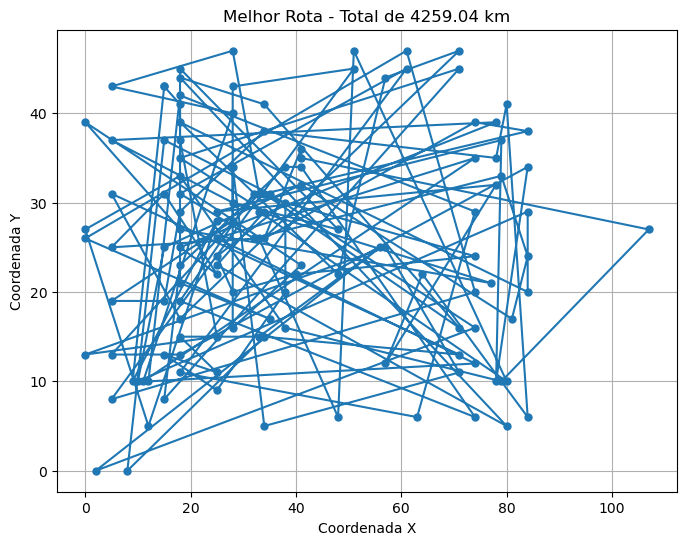

In [24]:
import matplotlib.pyplot as plt

# Melhor rota
melhor_rota = [
    (24, (15.0, 43.0)), (41, (18.0, 41.0)), (39, (18.0, 37.0)), (46, (25.0, 15.0)), (1, (0.0, 13.0)), (94, (57.0, 25.0)),
    (100, (71.0, 11.0)), (74, (34.0, 5.0)), (58, (28.0, 34.0)), (54, (28.0, 16.0)), (82, (41.0, 23.0)), (4, (0.0, 39.0)),
    (34, (18.0, 27.0)), (113, (77.0, 21.0)), (66, (33.0, 29.0)), (121, (80.0, 10.0)), (91, (51.0, 47.0)), (89, (48.0, 6.0)),
    (65, (33.0, 26.0)), (8, (5.0, 25.0)), (22, (15.0, 31.0)), (47, (25.0, 22.0)), (33, (18.0, 25.0)), (117, (78.0, 39.0)),
    (10, (5.0, 37.0)), (57, (28.0, 30.0)), (88, (48.0, 27.0)), (44, (18.0, 45.0)), (31, (18.0, 21.0)), (75, (35.0, 17.0)),
    (2, (0.0, 26.0)), (97, (61.0, 47.0)), (107, (74.0, 20.0)), (12, (5.0, 8.0)), (90, (51.0, 45.0)), (60, (28.0, 43.0)),
    (56, (28.0, 28.0)), (7, (5.0, 19.0)), (20, (15.0, 19.0)), (35, (18.0, 29.0)), (72, (34.0, 38.0)), (116, (78.0, 35.0)),
    (122, (80.0, 41.0)), (130, (84.0, 6.0)), (99, (64.0, 22.0)), (93, (57.0, 12.0)), (115, (78.0, 32.0)), (52, (25.0, 29.0)),
    (120, (79.0, 37.0)), (114, (78.0, 10.0)), (128, (84.0, 34.0)), (27, (18.0, 13.0)), (6, (5.0, 13.0)), (67, (33.0, 31.0)),
    (61, (28.0, 47.0)), (11, (5.0, 43.0)), (59, (28.0, 40.0)), (16, (11.0, 10.0)), (110, (74.0, 35.0)), (50, (25.0, 26.0)),
    (105, (74.0, 12.0)), (17, (12.0, 10.0)), (42, (18.0, 42.0)), (109, (74.0, 29.0)), (98, (63.0, 6.0)), (26, (18.0, 11.0)),
    (96, (61.0, 45.0)), (36, (18.0, 31.0)), (62, (32.0, 26.0)), (119, (79.0, 33.0)), (126, (84.0, 24.0)), (124, (81.0, 17.0)),
    (83, (41.0, 32.0)), (21, (15.0, 25.0)), (15, (10.0, 10.0)), (127, (84.0, 29.0)), (125, (84.0, 20.0)), (40, (18.0, 39.0)),
    (87, (48.0, 22.0)), (95, (57.0, 44.0)), (104, (71.0, 47.0)), (29, (18.0, 17.0)), (9, (5.0, 31.0)), (101, (71.0, 13.0)),
    (68, (34.0, 15.0)), (13, (8.0, 0.0)), (23, (15.0, 37.0)), (76, (35.0, 31.0)), (106, (74.0, 16.0)), (5, (2.0, 0.0)),
    (92, (56.0, 25.0)), (64, (33.0, 15.0)), (28, (18.0, 15.0)), (45, (25.0, 11.0)), (19, (15.0, 13.0)), (53, (25.0, 9.0)),
    (78, (38.0, 20.0)), (79, (38.0, 30.0)), (49, (25.0, 24.0)), (55, (28.0, 20.0)), (81, (40.0, 22.0)), (108, (74.0, 24.0)),
    (63, (32.0, 31.0)), (30, (18.0, 19.0)), (112, (74.0, 6.0)), (84, (41.0, 34.0)), (80, (38.0, 34.0)), (32, (18.0, 23.0)),
    (25, (15.0, 8.0)), (103, (71.0, 45.0)), (38, (18.0, 35.0)), (70, (34.0, 29.0)), (48, (25.0, 23.0)), (123, (80.0, 5.0)),
    (43, (18.0, 44.0)), (73, (34.0, 41.0)), (102, (71.0, 16.0)), (71, (34.0, 31.0)), (129, (84.0, 38.0)), (111, (74.0, 39.0)),
    (69, (34.0, 26.0)), (86, (41.0, 36.0)), (85, (41.0, 35.0)), (131, (107.0, 27.0)), (118, (79.0, 10.0)), (77, (38.0, 16.0)),
    (37, (18.0, 33.0)), (3, (0.0, 27.0)), (18, (12.0, 5.0)), (51, (25.0, 28.0)), (14, (9.0, 10.0))
]

# Função para calcular a distância entre duas cidades
def distancia_entre_cidades(cidade1, cidade2):
    x1, y1 = cidade1
    x2, y2 = cidade2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

# Calcular a distância total da melhor rota
distancia_total = 0.0
for i in range(len(melhor_rota) - 1):
    cidade1 = melhor_rota[i][1]
    cidade2 = melhor_rota[i + 1][1]
    distancia_total += distancia_entre_cidades(cidade1, cidade2)

# Adicione a distância de volta à primeira cidade para fechar o ciclo
cidade_inicial = melhor_rota[0][1]
cidade_final = melhor_rota[-1][1]
distancia_total += distancia_entre_cidades(cidade_final, cidade_inicial)

# Plote a rota
coordenadas = [rota[1] for rota in melhor_rota]
coordenadas.append(coordenadas[0])  # Adicione a primeira cidade no final para fechar o ciclo
x = [coord[0] for coord in coordenadas]
y = [coord[1] for coord in coordenadas]

# Exiba a distância total no título
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', markersize=5)
plt.title(f'Melhor Rota - Total de {distancia_total:.2f} km')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()
